In [1]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

In [114]:
output_csv = 'quantitative_results.csv'

In [ ]:
!pip install pandas

In [151]:
import pandas as pd

qual_df = pd.read_csv(output_csv)

In [153]:
file_names = qual_df[["File"]]

In [185]:
# Define a function to split the filename and handle errors
def split_filename(filename, index):
    parts = filename.split('_')
    if len(parts) > index:
        return parts[index]
    else:
        return None

# Splitting the 'filename' column into multiple columns
qual_df['characteristic_1'] = qual_df['File'].apply(lambda x: split_filename(x, 0))  # Splitting by underscore and taking the first part
qual_df['characteristic_2'] = qual_df['File'].apply(lambda x: split_filename(x, 1))  # Splitting by underscore and taking the second part
qual_df['characteristic_3'] = qual_df['File'].apply(lambda x: split_filename(x, 2))  # Splitting by underscore and taking the third part
qual_df['characteristic_4'] = qual_df['File'].apply(lambda x: split_filename(x, 3))  # Splitting by underscore and taking the third part
# Add more lines for additional characteristics as needed

# Displaying the updated DataFrame
print(qual_df)

                                        File  n  Repeated N-grams  \
0        conditional_topk_k=2560_large.jsonl  1             78739   
1        conditional_topk_k=2560_large.jsonl  2             19536   
2        conditional_topk_k=2560_large.jsonl  3              8006   
3        conditional_topk_k=2560_large.jsonl  4              5313   
4        conditional_topk_k=2560_large.jsonl  5              4158   
..                                       ... ..               ...   
315  conditional_topp_p=0.996875_large.jsonl  1             75466   
316  conditional_topp_p=0.996875_large.jsonl  2             17313   
317  conditional_topp_p=0.996875_large.jsonl  3              6695   
318  conditional_topp_p=0.996875_large.jsonl  4              4446   
319  conditional_topp_p=0.996875_large.jsonl  5              3467   

     Total N-grams  Repetition Percentage characteristic_1 characteristic_2  \
0           635228              12.395392      conditional             topk   
1           6

In [167]:
def split_x(x):
    if x:
        splitted = x.split("=")[0]
        if splitted[0] == "t":
            return False
        else:
            return True
    else:
        return None
qual_df['characteristic_5'] = qual_df['characteristic_4'].apply(lambda x:split_x(x))  # Splitting by underscore and taking the third part


In [173]:
qual_df_modified = qual_df[qual_df["characteristic_2"]=="topp"]

In [175]:
qual_df_modified2 = qual_df_modified[qual_df_modified["characteristic_5"]==True]

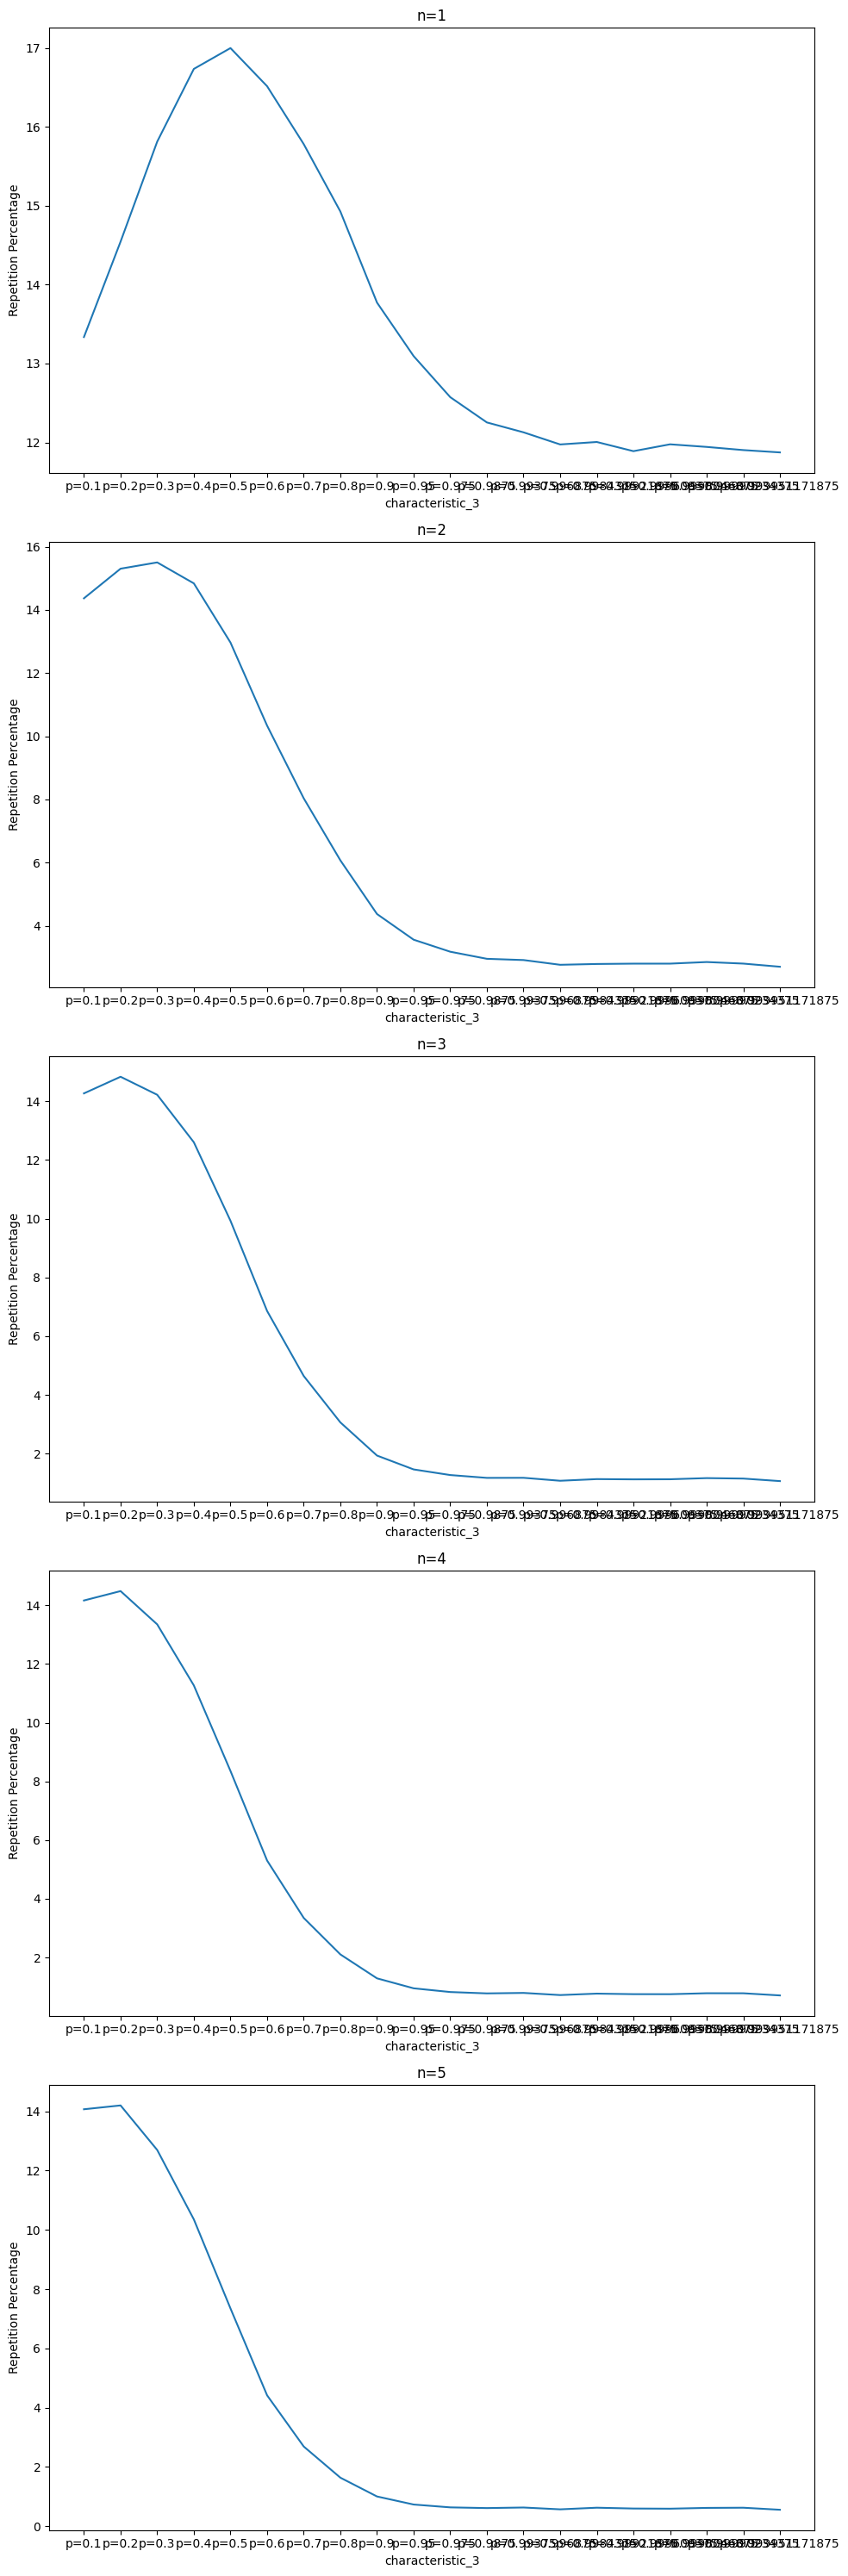

In [144]:
# Group the DataFrame by 'n' values
grouped_df = qual_df_modified.groupby('n')

# Get the number of unique 'n' values for subplots
num_plots = len(grouped_df)

# Create subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

# Iterate over each group and plot line plots
for i, (n_value, group) in enumerate(grouped_df):
    group_sorted = group.sort_values('characteristic_3')  # Sort the group by 'characteristic_3'
    axs[i].plot(group_sorted['characteristic_3'], group_sorted['Repetition Percentage'])
    axs[i].set_title(f'n={n_value}')
    axs[i].set_xlabel('characteristic_3')
    axs[i].set_ylabel('Repetition Percentage')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [179]:
qual_df_modified_k = qual_df[qual_df["characteristic_2"]=="topk"]
qual_df_modified_without_t = qual_df_modified_k[qual_df_modified_k["characteristic_5"]==True]


In [146]:
qual_df_modified_k.head(50)

,File,n,Repeated N-grams,Total N-grams,Repetition Percentage,characteristic_1,characteristic_2,characteristic_3,characteristic_4
0,conditional_topk_k=2560_large.jsonl,1,78739,635228,12.395392,conditional,topk,k=2560,large.jsonl
1,conditional_topk_k=2560_large.jsonl,2,19536,630228,3.099831,conditional,topk,k=2560,large.jsonl
2,conditional_topk_k=2560_large.jsonl,3,8006,625241,1.280466,conditional,topk,k=2560,large.jsonl
3,conditional_topk_k=2560_large.jsonl,4,5313,620269,0.856564,conditional,topk,k=2560,large.jsonl
4,conditional_topk_k=2560_large.jsonl,5,4158,615314,0.675753,conditional,topk,k=2560,large.jsonl
5,conditional_topk_k=10240_t=0.7_large.jsonl,1,105675,657305,16.077011,conditional,topk,k=10240,t=0.7
6,conditional_topk_k=10240_t=0.7_large.jsonl,2,63970,652305,9.806762,conditional,topk,k=10240,t=0.7
7,conditional_topk_k=10240_t=0.7_large.jsonl,3,41433,647313,6.400767,conditional,topk,k=10240,t=0.7
8,conditional_topk_k=10240_t=0.7_large.jsonl,4,31685,642330,4.932823,conditional,topk,k=10240,t=0.7
9,conditional_topk_k=10240_t=0.7_large.jsonl,5,26211,637356,4.112458,conditional,topk,k=10240,t=0.7


In [184]:
# "aguav".split("=")

In [183]:
# list(qual_df_modified_k['characteristic_3'])

In [137]:
qual_df_modified_k.head(50)

,File,n,Repeated N-grams,Total N-grams,Repetition Percentage,characteristic_1,characteristic_2,characteristic_3,k_val
0,conditional_topk_k=2560_large.jsonl,1,78739,635228,12.395392,conditional,topk,k=2560,2560
1,conditional_topk_k=2560_large.jsonl,2,19536,630228,3.099831,conditional,topk,k=2560,2560
2,conditional_topk_k=2560_large.jsonl,3,8006,625241,1.280466,conditional,topk,k=2560,2560
3,conditional_topk_k=2560_large.jsonl,4,5313,620269,0.856564,conditional,topk,k=2560,2560
4,conditional_topk_k=2560_large.jsonl,5,4158,615314,0.675753,conditional,topk,k=2560,2560
5,conditional_topk_k=10240_t=0.7_large.jsonl,1,105675,657305,16.077011,conditional,topk,k=10240,10240
6,conditional_topk_k=10240_t=0.7_large.jsonl,2,63970,652305,9.806762,conditional,topk,k=10240,10240
7,conditional_topk_k=10240_t=0.7_large.jsonl,3,41433,647313,6.400767,conditional,topk,k=10240,10240
8,conditional_topk_k=10240_t=0.7_large.jsonl,4,31685,642330,4.932823,conditional,topk,k=10240,10240
9,conditional_topk_k=10240_t=0.7_large.jsonl,5,26211,637356,4.112458,conditional,topk,k=10240,10240


In [180]:
qual_df_modified_without_t['k_val'] = qual_df_modified_without_t['characteristic_3'].apply(lambda x: int(x.split("=")[1]))

/var/folders/j5/dbr8cwz55rn69cyd00rvnmtr0000gn/T/ipykernel_49668/1107390642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qual_df_modified_without_t['k_val'] = qual_df_modified_without_t['characteristic_3'].apply(lambda x: int(x.split("=")[1]))


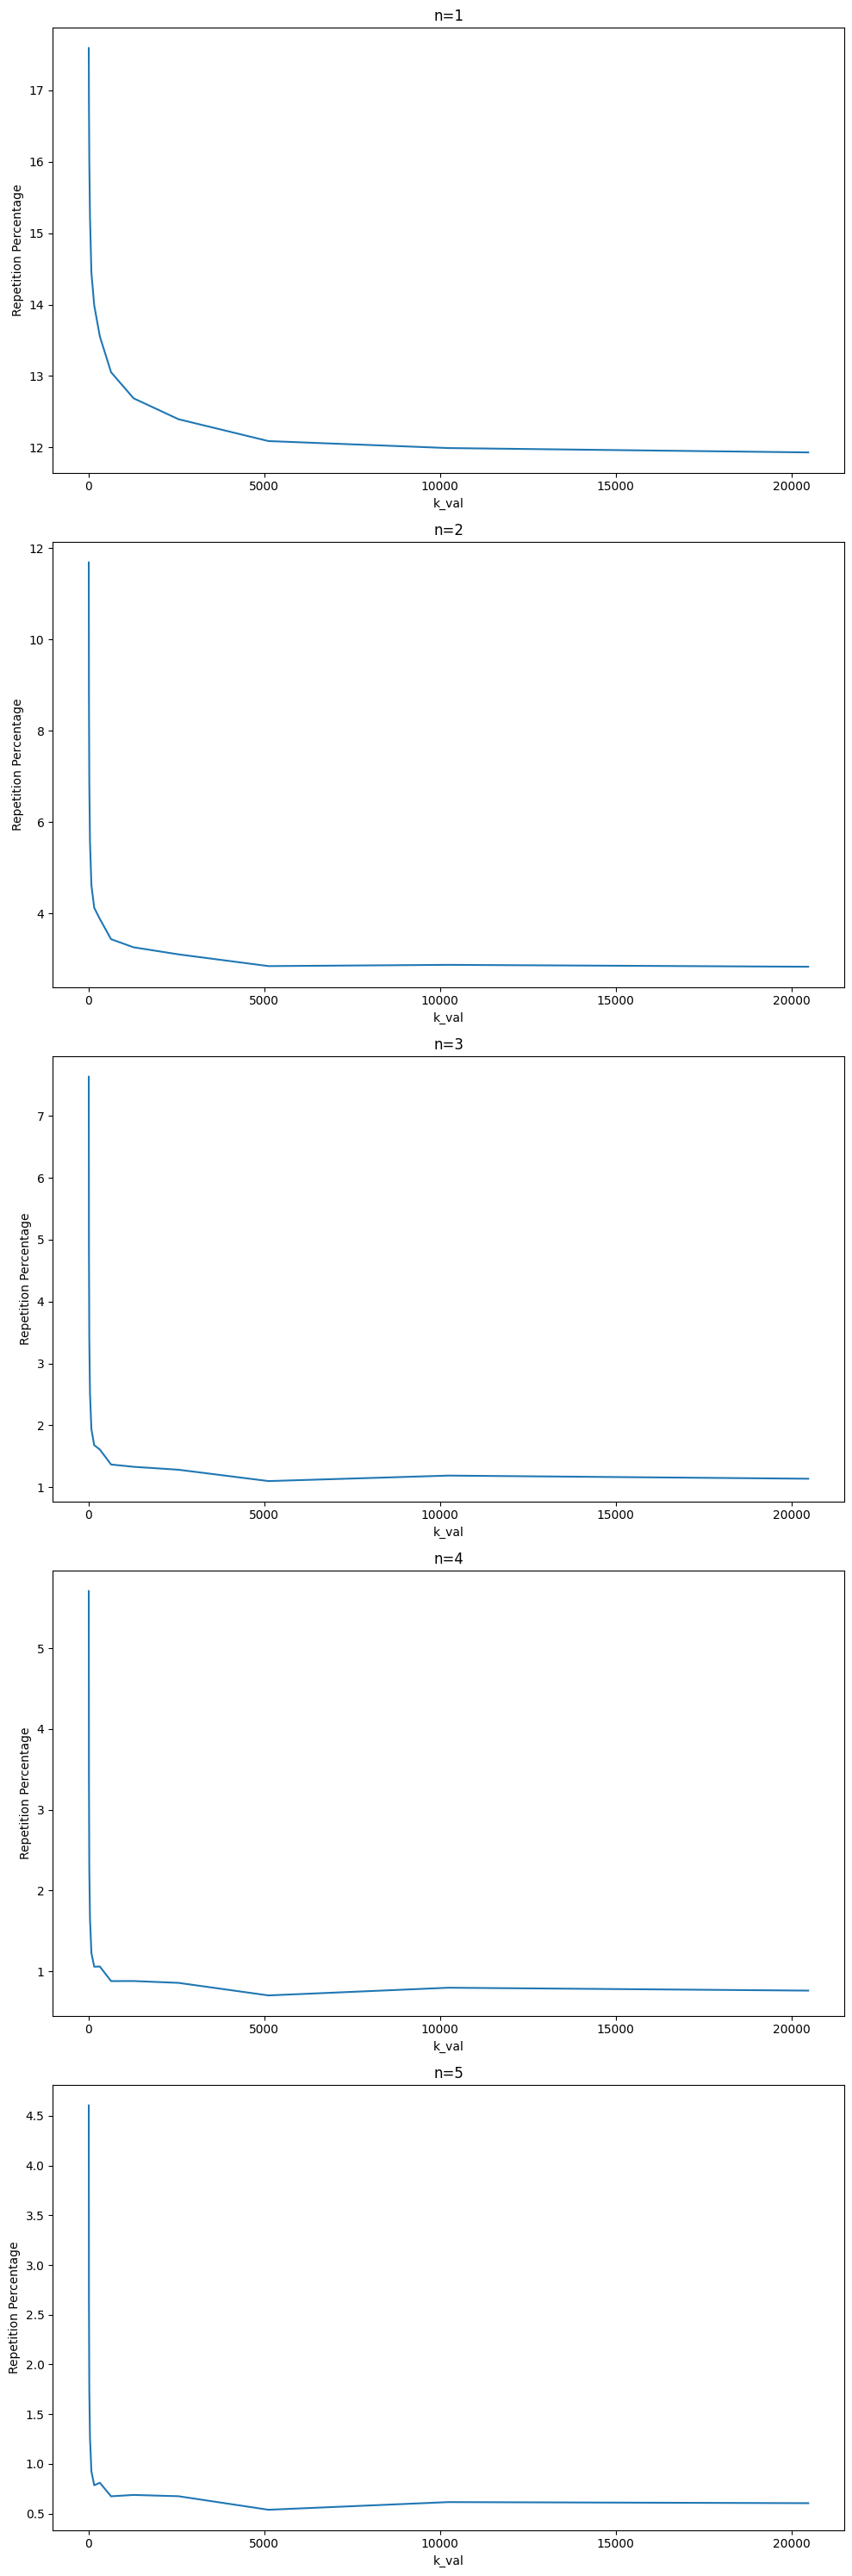

In [181]:
# Group the DataFrame by 'n' values
grouped_df_k = qual_df_modified_without_t.groupby('n')

# Get the number of unique 'n' values for subplots
num_plots = len(grouped_df_k)

# Create subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

# Iterate over each group and plot line plots
for i, (n_value, group) in enumerate(grouped_df_k):
    group_sorted = group.sort_values('k_val')  # Sort the group by 'characteristic_3'
    axs[i].plot(group_sorted['k_val'], group_sorted['Repetition Percentage'])
    axs[i].set_title(f'n={n_value}')
    axs[i].set_xlabel('k_val')
    axs[i].set_ylabel('Repetition Percentage')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [200]:
topp_10 = pd.read_csv(
    "results/perplexity_analysis/conditional_topp_p=0.1_large/conditional_topp_p=0.1_large_ngram_1.csv")
print(topp_10["ppl"].mean())

1.6165073753616384


In [201]:
topp_20 = pd.read_csv(
    "results/perplexity_analysis/conditional_topp_p=0.2_large/conditional_topp_p=0.2_large_ngram_1.csv")
print(topp_20["ppl"].mean())

1.800364306878904


In [202]:
topp_30 = pd.read_csv(
    "results/perplexity_analysis/conditional_topp_p=0.3_large/conditional_topp_p=0.3_large_ngram_1.csv")
print(topp_30["ppl"].mean())

2.1293945546128117


In [203]:
topp_40 = pd.read_csv("results/perplexity_analysis/conditional_topp_p=0.4_large/conditional_topp_p=0.4_large_ngram_1.csv")
print(topp_40["ppl"].mean())

2.5843314482972173


In [204]:
topp_50 = pd.read_csv("results/perplexity_analysis/conditional_topp_p=0.5_large/conditional_topp_p=0.5_large_ngram_1.csv")
print(topp_50["ppl"].mean())

3.17780711794573


In [205]:
topp_60 = pd.read_csv("results/perplexity_analysis/conditional_topp_p=0.6_large/conditional_topp_p=0.6_large_ngram_1.csv")
print(topp_60["ppl"].mean())

3.9987976160164487


In [206]:
topp_70 = pd.read_csv("results/perplexity_analysis/conditional_topp_p=0.7_large/conditional_topp_p=0.7_large_ngram_1.csv")
print(topp_70["ppl"].mean())

5.227897689532652


In [207]:
topp_80 = pd.read_csv("results/perplexity_analysis/conditional_topp_p=0.8_large/conditional_topp_p=0.8_large_ngram_1.csv")
print(topp_80["ppl"].mean())

7.4081067813847765


In [208]:
topp_90 = pd.read_csv("results/perplexity_analysis/conditional_topp_p=0.9_large/conditional_topp_p=0.9_large_ngram_1.csv")
print(topp_90["ppl"].mean())

11.40273177012058


In [209]:
topp_95 = pd.read_csv("results/perplexity_analysis/conditional_topp_p=0.95_large/conditional_topp_p=0.95_large_ngram_1.csv")
print(topp_95["ppl"].mean())

18.106128678424582


In [210]:
topp_975 = pd.read_csv(
    "results/perplexity_analysis/conditional_topp_p=0.975_large/conditional_topp_p=0.975_large_ngram_1.csv")
print(topp_975["ppl"].mean())

20.224877227513545


In [211]:
topp_9875 = pd.read_csv(
    "results/perplexity_analysis/conditional_topp_p=0.9875_large/conditional_topp_p=0.9875_large_ngram_1.csv")
print(topp_9875["ppl"].mean())

24.22883439479928


In [212]:
topp_99375 = pd.read_csv(
    "results/perplexity_analysis/conditional_topp_p=0.99375_large/conditional_topp_p=0.99375_large_ngram_1.csv")
print(topp_99375["ppl"].mean())

28.24318789418054


In [8]:
topp_999951171875 = pd.read_csv(
    "results/perplexity_analysis/conditional_topp_p=0.999951171875_large/conditional_topp_p=0.999951171875_large_ngram_1.csv")
print(topp_999951171875["ppl"].mean())

30.51257144897894


4.481712947013195
